In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('../data/wine/wine.data')
df.columns = ['Label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids',
              'Nonflavanoid phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280_OD315',
              'Proline']
df = df[df['Label'] != 1]
y = df['Label'].values
X = df[['Alcohol', 'Hue']].values

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
                                                    random_state=1)

In [11]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None,
                              random_state=1)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        max_samples=1.,
                        max_features=1.,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=4,
                        random_state=1)

In [13]:
tree.fit(X_train, y_train)
train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, tree.predict(X_test))
print(f'Decision tree accuracy train/test score: {train_acc:.3f}/{test_acc:.3f}')

Decision tree accuracy train/test score: 1.000/0.833


In [14]:
bag.fit(X_train, y_train)
train_acc = accuracy_score(y_train, bag.predict(X_train))
test_acc = accuracy_score(y_test, bag.predict(X_test))
print(f'Bagging accuracy train/test score: {train_acc:.3f}/{test_acc:.3f}')

Bagging accuracy train/test score: 1.000/0.896


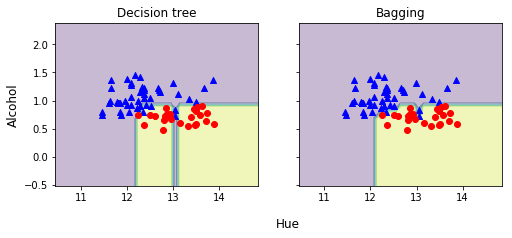

In [30]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))
f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col', 
                        sharey='row',
                        figsize=(8, 3))
for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                       X_train[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                       X_train[y_train==1, 1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,
         s='Hue', fontsize=12,
         ha='center', va='center')
plt.show()